In [137]:
!pip install nltk
!pip3 install swifter
!pip3 install PySastrawi

In [138]:
import pandas as pd # Pandas juga dapat membaca file dari berbagai format seperti .txt, .csv, .tsv, dan lainnya
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re # ekspresi reguler adalah urutan karakter khusus yang membantu Anda mencocokkan atau menemukan string atau kumpulan string lain
import string
import nltk # libray python untuk bekerja dengan permodelan teks
nltk.download('punkt')
nltk.download('stopwords')

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
!pip install sastrawi

In [140]:
from google.colab import files
uploades = files.upload()

Saving dataset-ban.csv to dataset-ban.csv


In [141]:
data = pd.read_csv("dataset-ban.csv")
data.head(200)

,Dokumen,Deskripsi
0,d1,Ban ini aus karena mengalami kerusakan dan sud...
1,d2,Ban ini aus karena sudah dibawah panah twi dan...
2,d3,Ban ini menunjukkan tanda keausan yang signifi...
3,d4,Ban ini telah mencapai masa pakainya yang maks...
4,d5,Ban tersebut terlihat aus dengan pola kembang ...
...,...,...
195,d196,Ban ini berada dalam kondisi normal dengan uku...
196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...
197,d198,Ban ini masih dalam kondisi normal dengan ukur...
198,d199,Ban ini dalam kondisi normal dan masih baru. T...


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Dokumen    200 non-null    object
 1   Deskripsi  200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [143]:
#Casefolding

import re

#fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                                    #mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\s+', ' ', text)     #menghapus URL
  #text = re.sub(r'[-+]?[0-9]+', ' ', text)               #menghapus angka
  text = re.sub(r'[^\w\s]', ' ', text)                   #menghapus karakter tanda baca
  #text = re.sub(r'[^/\w\s]|(?<!/)/(?!/)', '', text)       # Menghapus karakter tanda baca kecuali "/", angka 0-9, dan whitespace
  text = text.strip()
  return text

In [144]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)

Data awal	:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding	:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan


In [145]:
#tokenize

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [146]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)
print('Tokenize\t: ', text_tokenize)

Data awal	:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding	:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize	:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']


In [147]:
#NORMALISASI

#corpus kumpulan slangwords dari github

!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2023-11-29 16:22:53--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.02s   

2023-11-29 16:22:53 (3.63 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [148]:
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [149]:

def textnormalize(text):
    normalized_text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text])
    normalized_text = str.lower(normalized_text)
    return normalized_text


In [150]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)
print('Tokenize\t: ', text_tokenize)
print('Normalisasi\t: ', text_normalize)

Data awal	:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding	:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize	:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']
Normalisasi	:  ban ini aus karena mengalami kerusakan dan sudah tipis terdapat retakan sobekan kecil yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering di

In [151]:
#filtering (stopword removal)

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [152]:
len(stopwords_ind)

758

In [153]:
#daftar stopword yang disediakan NLTK
stopwords_ind[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [154]:
#fungsi untuk langkah stopword removal

more_stopword = ['ini', 'karena', 'sudah', 'dan', 'dapat',
                 'yang', 'oleh', 'sebab', 'guna', 'di',
                 'serta', 'nya', 'dengan', 'pada', 'selain',
                 'itu', 'juga', 'jadi', 'setelah', 'dalam',
                 'kini', 'dulu', 'telah', 'bahkan', 'akibat',
                 'tersebut', 'sebut', 'tidak', 'ketika', 'atau',
                 'ke', 'terhadap', 'sehingga', 'hingga', 'bagian', 'secara',
                 'hal', 'saat', 'manuver', 'medan', 'sedangkan', 'mungkin',
                 'bahwa', 'perlu', 'bisa', 'segera', 'saat', 'adalah',
                 'daya', 'merek', 'untuk', 'umur', 'zat', 'lainnya',
                 'lain', 'rasa', 'kord', 'benjolan', 'lihat', 'kontak',
                 'seperti', 'serius', 'lewat', 'mencurigakan', 'curiga',
                 'tanpa', 'panah', 'r']        #tambah kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [155]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)
stopword_removal =  remove_stop_words(text_normalize)

print('Data awal\t\t: ', data_awal)
print('Case folding\t\t: ', case_folding)
print('Tokenize\t\t: ', text_tokenize)
print('Normalisasi\t\t: ', text_normalize)
print('Stopword removal\t: ', stopword_removal)

Data awal		:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding		:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize		:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']
Normalisasi		:  ban ini aus karena mengalami kerusakan dan sudah tipis terdapat retakan sobekan kecil yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan serin

In [156]:
#stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.Stemmer.Context.Visitor.VisitorProvider import VisitorProvider

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemming aturan khusus
custom_dictionary = {
    'kerusakan': 'rusak',
    'retakan': 'retak',
    'perawatan': 'rawat'
}

#fungsi untuk langkah stemming bahasa indonesia
def stemming(text):
    stemmed_words = []
    text = text.split()
    for word in text:
        if word in custom_dictionary:
            stemmed_word = custom_dictionary[word]
        else:
            stemmed_word = stemmer.stem(word)
        stemmed_words.append(stemmed_word)
    text = ' '.join(stemmed_words)
    return text

In [157]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)
stopword_removal =  remove_stop_words(text_normalize)
text_stemming = stemming(stopword_removal)

print('Data awal\t\t: ', data_awal)
print('Case folding\t\t: ', case_folding)
print('Tokenize\t\t: ', text_tokenize)
print('Normalisasi\t\t: ', text_normalize)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Data awal		:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding		:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize		:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']
Normalisasi		:  ban ini aus karena mengalami kerusakan dan sudah tipis terdapat retakan sobekan kecil yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan serin

In [158]:
#fungsi unruk menggabungkan seluruh langkah preprocessing

def text_preprocessing_process(text):
  text = casefolding(text)
  text = tokenize_text(text)
  text = textnormalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [159]:
#waktu komputasi ketika proses text processing
%%time
data['clean_teks'] = data['Deskripsi'].apply(text_preprocessing_process)


CPU times: user 23.2 s, sys: 20.7 ms, total: 23.2 s
Wall time: 35.3 s


In [160]:
data

,Dokumen,Deskripsi,clean_teks
0,d1,Ban ini aus karena mengalami kerusakan dan sud...,ban aus alami rusak tipis retak sobek sebab gu...
1,d2,Ban ini aus karena sudah dibawah panah twi dan...,ban aus bawah twi alami rusak parah sobek teks...
2,d3,Ban ini menunjukkan tanda keausan yang signifi...,ban tanda aus signifikan pakai jalan jarak lew...
3,d4,Ban ini telah mencapai masa pakainya yang maks...,ban capai pakai maksimal tapak ban halus aus a...
4,d5,Ban tersebut terlihat aus dengan pola kembang ...,ban aus pola kembang kikis atur jalan basah ce...
...,...,...,...
195,d196,Ban ini berada dalam kondisi normal dengan uku...,ban kondisi normal ukur ban 195i65 r15 twi tap...
196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...,ban normal ukur ban 215i60 r16 twi tapak ban m...
197,d198,Ban ini masih dalam kondisi normal dengan ukur...,ban kondisi normal ukur ban 185i55 r15 twi tap...
198,d199,Ban ini dalam kondisi normal dan masih baru. T...,ban kondisi normal bulu karet tapak ban jarak ...


In [161]:
#simpan data agar tidak menjalankan proses ulang
data.to_csv('clean_data.csv')

In [162]:
data = pd.read_csv('clean_data.csv')

In [163]:
data

,Unnamed: 0,Dokumen,Deskripsi,clean_teks
0,0,d1,Ban ini aus karena mengalami kerusakan dan sud...,ban aus alami rusak tipis retak sobek sebab gu...
1,1,d2,Ban ini aus karena sudah dibawah panah twi dan...,ban aus bawah twi alami rusak parah sobek teks...
2,2,d3,Ban ini menunjukkan tanda keausan yang signifi...,ban tanda aus signifikan pakai jalan jarak lew...
3,3,d4,Ban ini telah mencapai masa pakainya yang maks...,ban capai pakai maksimal tapak ban halus aus a...
4,4,d5,Ban tersebut terlihat aus dengan pola kembang ...,ban aus pola kembang kikis atur jalan basah ce...
...,...,...,...,...
195,195,d196,Ban ini berada dalam kondisi normal dengan uku...,ban kondisi normal ukur ban 195i65 r15 twi tap...
196,196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...,ban normal ukur ban 215i60 r16 twi tapak ban m...
197,197,d198,Ban ini masih dalam kondisi normal dengan ukur...,ban kondisi normal ukur ban 185i55 r15 twi tap...
198,198,d199,Ban ini dalam kondisi normal dan masih baru. T...,ban kondisi normal bulu karet tapak ban jarak ...


In [164]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)
data['Deskripsi_tokens'] = data['clean_teks'].apply(word_tokenize_wrapper)

In [165]:
data_awal = str(data['clean_teks'].iloc[1])
text_tokenize = word_tokenize_wrapper(data_awal)

print('Data awal\t: ', data_awal)
print('Tokenize\t: ', text_tokenize)

Data awal	:  ban aus bawah twi alami rusak parah sobek tekstur tapak warna ban ubah pudar tanda guna intensif kurang rawat
Tokenize	:  ['ban', 'aus', 'bawah', 'twi', 'alami', 'rusak', 'parah', 'sobek', 'tekstur', 'tapak', 'warna', 'ban', 'ubah', 'pudar', 'tanda', 'guna', 'intensif', 'kurang', 'rawat']


In [166]:
(data['Deskripsi_tokens'].head())

0    [ban, aus, alami, rusak, tipis, retak, sobek, ...
1    [ban, aus, bawah, twi, alami, rusak, parah, so...
2    [ban, tanda, aus, signifikan, pakai, jalan, ja...
3    [ban, capai, pakai, maksimal, tapak, ban, halu...
4    [ban, aus, pola, kembang, kikis, atur, jalan, ...
Name: Deskripsi_tokens, dtype: object

In [167]:
#NLTK clac frequency distribution
from nltk.probability import FreqDist
def freqDist_wrapper(text):
  return FreqDist(text)
data['Kata Dominan'] = data['Deskripsi_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(data['Kata Dominan'].head(100).apply(lambda x : x.most_common()))

Frequency Tokens : 

0     [(ban, 2), (aus, 1), (alami, 1), (rusak, 1), (...
1     [(ban, 2), (aus, 1), (bawah, 1), (twi, 1), (al...
2     [(ban, 1), (tanda, 1), (aus, 1), (signifikan, ...
3     [(ban, 2), (aus, 2), (capai, 1), (pakai, 1), (...
4     [(ban, 1), (aus, 1), (pola, 1), (kembang, 1), ...
                            ...                        
95    [(ban, 2), (tanda, 2), (aus, 2), (tapak, 2), (...
96    [(retak, 4), (ban, 3), (aus, 2), (tapak, 2), (...
97    [(ban, 4), (tanda, 3), (rusak, 3), (aus, 2), (...
98    [(bercak, 6), (ban, 4), (licin, 3), (kondisi, ...
99    [(gores, 6), (ban, 3), (aus, 2), (tapak, 2), (...
Name: Kata Dominan, Length: 100, dtype: object


In [168]:
#gabung deskripsi ban
teks_total = ' '.join(data['clean_teks'].iloc[:200])

In [169]:
tokens = word_tokenize(teks_total)

In [170]:
frekuensi = FreqDist(tokens)

In [171]:
for token, count in sorted(frekuensi.items(), key=lambda x: x[1], reverse=True):
    print(token, ":", count)

ban : 591
tapak : 250
aus : 178
kondisi : 127
normal : 96
pola : 85
twi : 84
tanda : 83
kembang : 72
kendara : 62
tebal : 61
ukur : 59
alur : 59
jarak : 58
awat : 45
karet : 42
r17 : 39
sebab : 35
warna : 34
halus : 33
kasar : 31
jaga : 29
rata : 28
jalan : 27
alami : 25
sesuai : 25
tajam : 24
signifikan : 22
bulu : 22
cukup : 21
rusak : 20
traksi : 20
pekat : 20
retak : 19
ukir : 19
mulus : 19
kurang : 18
guna : 17
pengaruh : 17
ganti : 16
hilang : 15
gores : 15
performa : 15
optimal : 15
parah : 14
cengkeram : 14
hitam : 14
serabut : 14
milik : 14
pakai : 13
capai : 13
rem : 13
batas : 13
kikis : 12
tingkat : 12
ubah : 11
tampil : 11
lapis : 10
licin : 10
bridgestone : 10
bercak : 10
pada : 10
turun : 9
tepi : 9
tekan : 9
usia : 9
dunlop : 9
sentuh : 9
sistem : 8
stabilitas : 8
r16 : 8
suspensi : 8
michelin : 8
indikator : 8
mampu : 7
aman : 7
r15 : 7
pirelli : 7
cepat : 7
bagus : 7
180i55 : 7
190i50 : 7
160i60 : 7
rawat : 6
lewat : 6
nyaman : 6
udara : 6
area : 6
banding : 6
200i55 

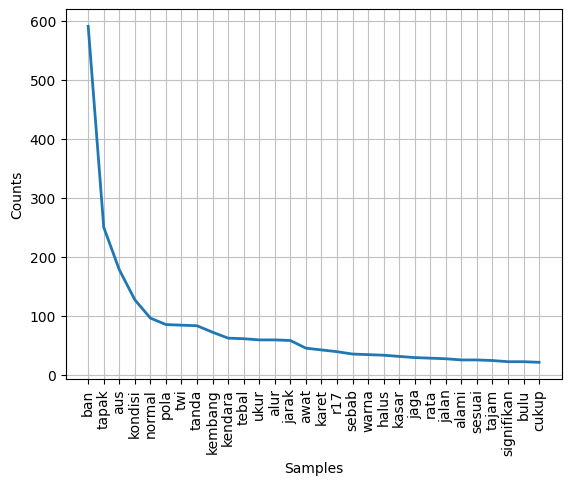

In [172]:
frekuensi.plot(30, cumulative=False)
plt.show()

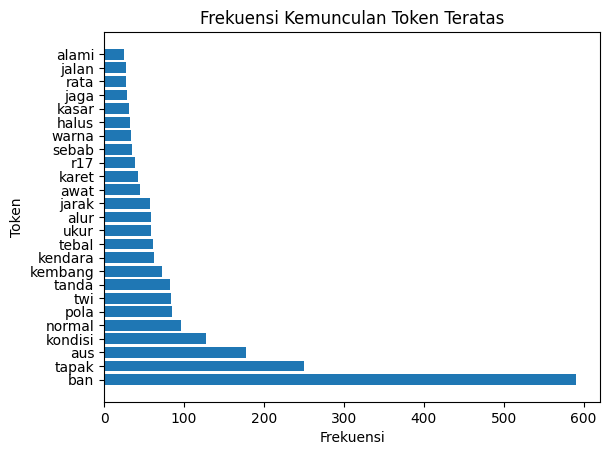

In [173]:
# Mengambil brp token dengan frekuensi tertinggi
top_tokens = frekuensi.most_common(25)

# Menyusun data untuk grafik
tokens = [token[0] for token in top_tokens]
counts = [token[1] for token in top_tokens]

# Menampilkan grafik diagram batang horizontal
plt.barh(tokens, counts)
plt.xlabel('Frekuensi')
plt.ylabel('Token')
plt.title('Frekuensi Kemunculan Token Teratas')
plt.show()

In [207]:
#gabung deskripsi ban aus
teks_total = ' '.join(data['clean_teks'].iloc[:100])

tokens = word_tokenize(teks_total)

frekuensi = FreqDist(tokens)

for token, count in sorted(frekuensi.items(), key=lambda x: x[1], reverse=True):
    print(token, ":", count)

ban : 229
aus : 176
tapak : 97
tanda : 79
kendara : 59
sebab : 35
halus : 33
pola : 30
rata : 28
kondisi : 25
alami : 24
jalan : 23
signifikan : 22
rusak : 20
karet : 20
retak : 19
kurang : 18
guna : 17
kembang : 17
pengaruh : 17
traksi : 17
ganti : 16
hilang : 15
gores : 15
parah : 14
serabut : 14
twi : 13
pakai : 13
capai : 13
rem : 13
batas : 13
warna : 12
kasar : 12
kikis : 12
tingkat : 12
cengkeram : 11
lapis : 10
performa : 10
licin : 10
ukur : 10
bercak : 10
turun : 9
tepi : 9
tekan : 9
usia : 9
jaga : 9
sentuh : 9
ubah : 8
sistem : 8
suspensi : 8
indikator : 8
mampu : 7
stabilitas : 7
cepat : 7
rawat : 6
lewat : 6
tajam : 6
optimal : 6
udara : 6
area : 6
banding : 6
tua : 5
kelupas : 5
bahan : 5
abu : 5
indikasi : 5
keras : 5
nyaman : 5
beban : 5
sesuai : 5
lebih : 5
aman : 5
ketidakseimbangan : 5
terang : 5
kilap : 5
tekstur : 4
risiko : 4
batu : 4
biasa : 4
kuat : 4
offroad : 4
hadap : 4
imbang : 4
alur : 4
tipis : 3
sobek : 3
cuaca : 3
intensif : 3
ekstrem : 3
tahan : 3
peca

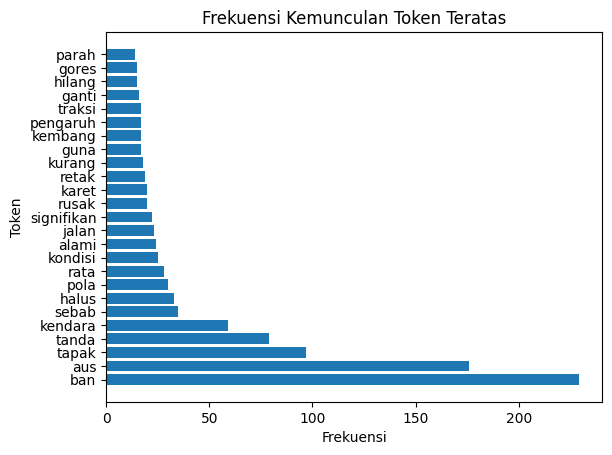

In [208]:
# Mengambil brp token dengan frekuensi tertinggi
top_tokens = frekuensi.most_common(25)

# Menyusun data untuk grafik
tokens = [token[0] for token in top_tokens]
counts = [token[1] for token in top_tokens]

# Menampilkan grafik diagram batang horizontal
plt.barh(tokens, counts)
plt.xlabel('Frekuensi')
plt.ylabel('Token')
plt.title('Frekuensi Kemunculan Token Teratas')
plt.show()

In [209]:
#gabung deskripsi ban aus
teks_total = ' '.join(data['clean_teks'].iloc[101:200])

tokens = word_tokenize(teks_total)

frekuensi = FreqDist(tokens)

for token, count in sorted(frekuensi.items(), key=lambda x: x[1], reverse=True):
    print(token, ":", count)

ban : 361
tapak : 152
kondisi : 101
normal : 95
twi : 71
tebal : 61
jarak : 56
pola : 55
kembang : 55
alur : 55
ukur : 49
awat : 45
r17 : 37
warna : 22
bulu : 22
karet : 22
cukup : 21
sesuai : 20
kasar : 19
jaga : 19
pekat : 19
ukir : 19
mulus : 19
tajam : 18
milik : 14
hitam : 12
tampil : 11
pada : 10
optimal : 8
bagus : 7
michelin : 7
180i55 : 7
bridgestone : 7
190i50 : 7
160i60 : 7
dunlop : 7
r16 : 6
pirelli : 6
200i55 : 6
performa : 5
r15 : 5
tanda : 4
170i60 : 4
metzeler : 4
jalan : 3
ubah : 3
cengkeram : 3
kendara : 3
195i65 : 3
215i60 : 3
irc : 3
150i70 : 3
andal : 2
traksi : 2
aus : 2
kualitas : 2
yakin : 2
aman : 2
205i55 : 2
225i50 : 2
185i55 : 2
standart : 2
internasional : 2
hadap : 1
alami : 1
tahan : 1
stabilitas : 1
jadi : 1
pilih : 1
percaya : 1
nyaman : 1
rapi : 1
195i60 : 1
205i50 : 1
225i55 : 1
r18 : 1


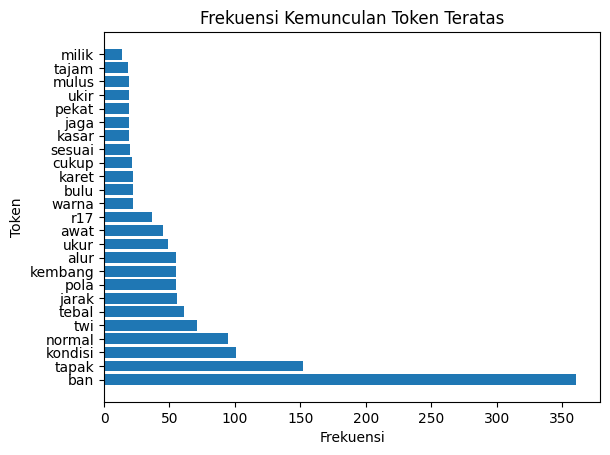

In [210]:
# Mengambil brp token dengan frekuensi tertinggi
top_tokens = frekuensi.most_common(25)

# Menyusun data untuk grafik
tokens = [token[0] for token in top_tokens]
counts = [token[1] for token in top_tokens]

# Menampilkan grafik diagram batang horizontal
plt.barh(tokens, counts)
plt.xlabel('Frekuensi')
plt.ylabel('Token')
plt.title('Frekuensi Kemunculan Token Teratas')
plt.show()

In [174]:
#import library wordcloud. wordcloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul
#import library cv2 untuk mengolah gambar manjadi masking wourdcloud

import cv2
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [175]:
#download gammbbar masking dari github
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-11-29 16:23:30--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.01s   

2023-11-29 16:23:31 (3.36 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [176]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 225, cv2.THRESH_BINARY)

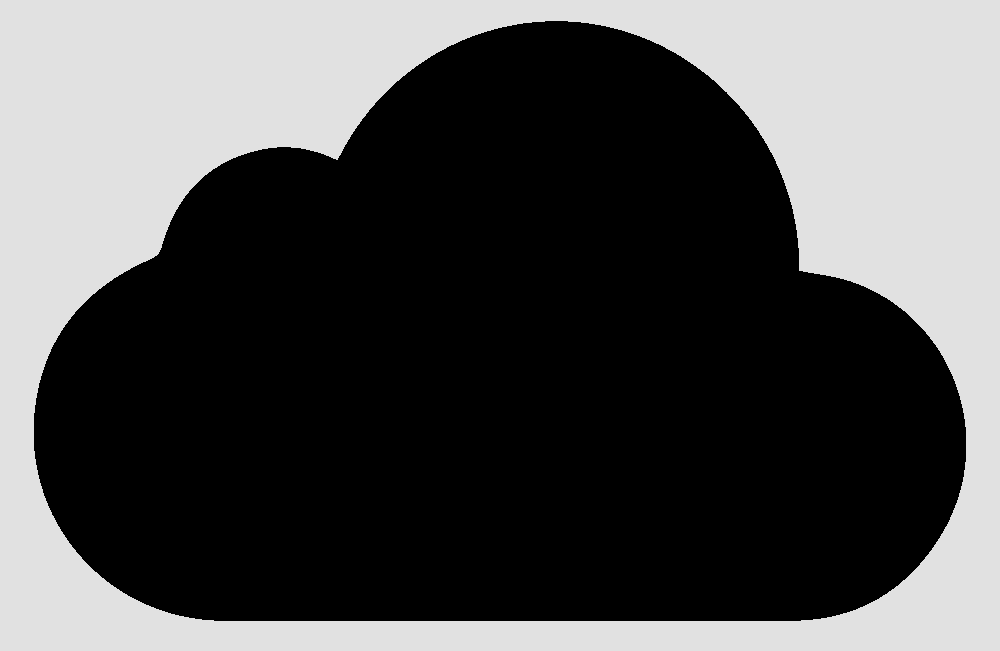

In [177]:
#TAMPILKAN MASKING
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

In [178]:
data = pd.read_csv('clean_data.csv')

In [179]:
data

,Unnamed: 0,Dokumen,Deskripsi,clean_teks
0,0,d1,Ban ini aus karena mengalami kerusakan dan sud...,ban aus alami rusak tipis retak sobek sebab gu...
1,1,d2,Ban ini aus karena sudah dibawah panah twi dan...,ban aus bawah twi alami rusak parah sobek teks...
2,2,d3,Ban ini menunjukkan tanda keausan yang signifi...,ban tanda aus signifikan pakai jalan jarak lew...
3,3,d4,Ban ini telah mencapai masa pakainya yang maks...,ban capai pakai maksimal tapak ban halus aus a...
4,4,d5,Ban tersebut terlihat aus dengan pola kembang ...,ban aus pola kembang kikis atur jalan basah ce...
...,...,...,...,...
195,195,d196,Ban ini berada dalam kondisi normal dengan uku...,ban kondisi normal ukur ban 195i65 r15 twi tap...
196,196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...,ban normal ukur ban 215i60 r16 twi tapak ban m...
197,197,d198,Ban ini masih dalam kondisi normal dengan ukur...,ban kondisi normal ukur ban 185i55 r15 twi tap...
198,198,d199,Ban ini dalam kondisi normal dan masih baru. T...,ban kondisi normal bulu karet tapak ban jarak ...


In [180]:
all_text = ' '.join(data['clean_teks'].astype(str))

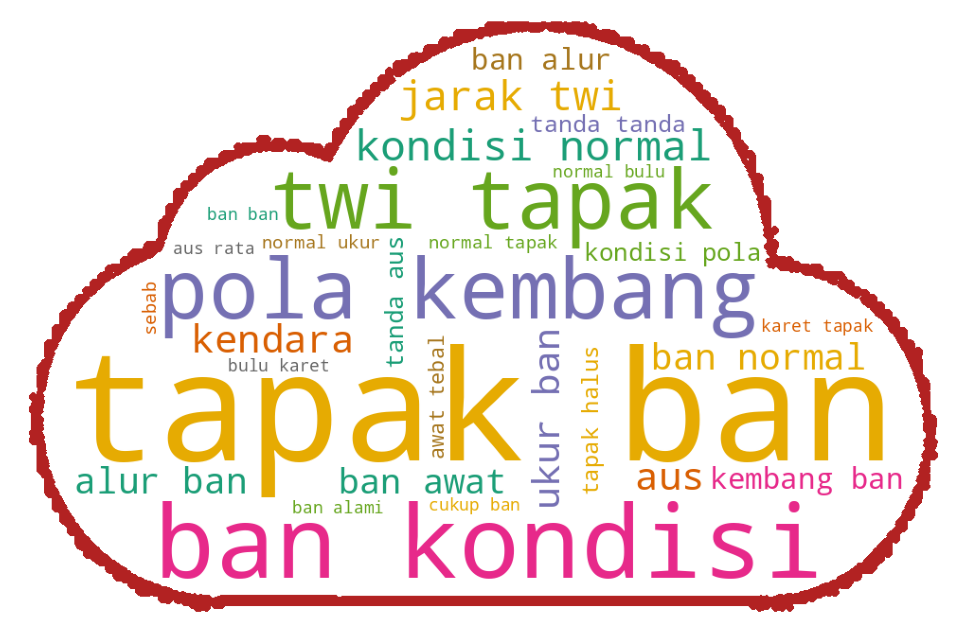

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=15,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=250).generate(all_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [182]:
data = pd.read_csv('clean_data.csv')

In [183]:
filtered_data = data.loc[0:99, 'clean_teks']

In [184]:
aus_text = ' '.join(filtered_data.astype(str))

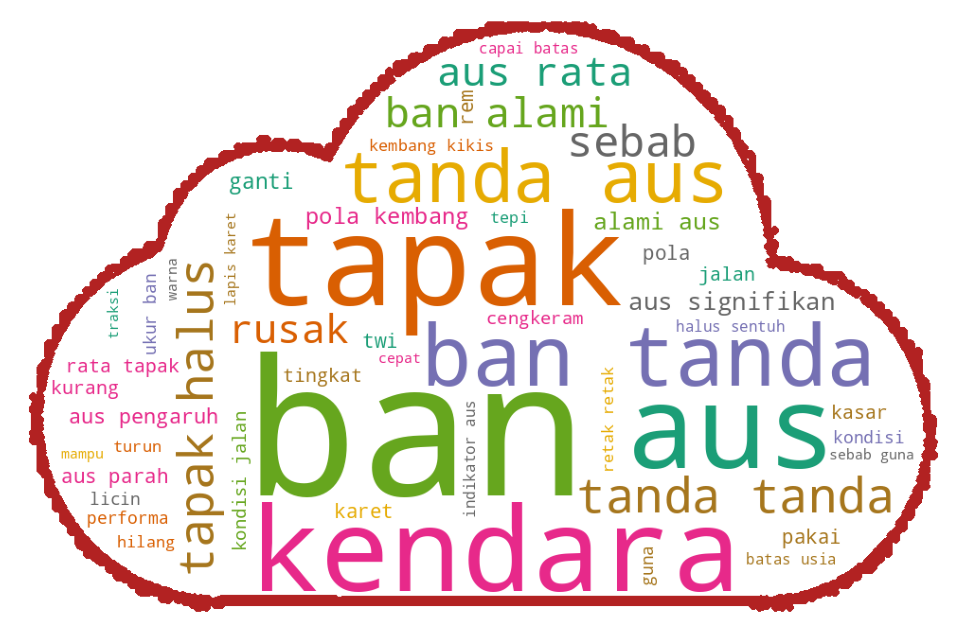

In [185]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=15,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=200).generate(aus_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [186]:
data = pd.read_csv('clean_data.csv')

In [187]:
filtered_data = data.loc[100:199, 'clean_teks']

In [188]:
normal_text = ' '.join(filtered_data.astype(str))

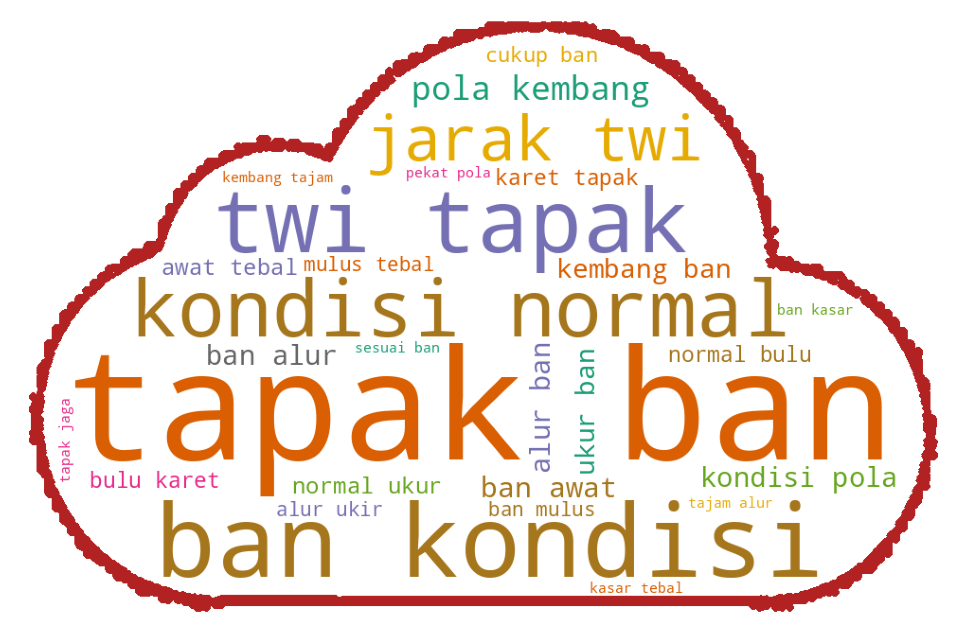

In [189]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=15,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=200).generate(normal_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

BATAS WORDCLOUD

In [190]:
data = pd.read_csv('clean_data.csv')

In [191]:
data

,Unnamed: 0,Dokumen,Deskripsi,clean_teks
0,0,d1,Ban ini aus karena mengalami kerusakan dan sud...,ban aus alami rusak tipis retak sobek sebab gu...
1,1,d2,Ban ini aus karena sudah dibawah panah twi dan...,ban aus bawah twi alami rusak parah sobek teks...
2,2,d3,Ban ini menunjukkan tanda keausan yang signifi...,ban tanda aus signifikan pakai jalan jarak lew...
3,3,d4,Ban ini telah mencapai masa pakainya yang maks...,ban capai pakai maksimal tapak ban halus aus a...
4,4,d5,Ban tersebut terlihat aus dengan pola kembang ...,ban aus pola kembang kikis atur jalan basah ce...
...,...,...,...,...
195,195,d196,Ban ini berada dalam kondisi normal dengan uku...,ban kondisi normal ukur ban 195i65 r15 twi tap...
196,196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...,ban normal ukur ban 215i60 r16 twi tapak ban m...
197,197,d198,Ban ini masih dalam kondisi normal dengan ukur...,ban kondisi normal ukur ban 185i55 r15 twi tap...
198,198,d199,Ban ini dalam kondisi normal dan masih baru. T...,ban kondisi normal bulu karet tapak ban jarak ...


In [192]:
data.shape

(200, 4)

In [193]:
data.columns

Index(['Unnamed: 0', 'Dokumen', 'Deskripsi', 'clean_teks'], dtype='object')

In [194]:
data.drop(['Deskripsi', 'Unnamed: 0'], axis=1, inplace=True)

In [195]:
data

,Dokumen,clean_teks
0,d1,ban aus alami rusak tipis retak sobek sebab gu...
1,d2,ban aus bawah twi alami rusak parah sobek teks...
2,d3,ban tanda aus signifikan pakai jalan jarak lew...
3,d4,ban capai pakai maksimal tapak ban halus aus a...
4,d5,ban aus pola kembang kikis atur jalan basah ce...
...,...,...
195,d196,ban kondisi normal ukur ban 195i65 r15 twi tap...
196,d197,ban normal ukur ban 215i60 r16 twi tapak ban m...
197,d198,ban kondisi normal ukur ban 185i55 r15 twi tap...
198,d199,ban kondisi normal bulu karet tapak ban jarak ...


In [196]:
data.loc[0:99, 'Label'] = 'Ban Aus'
data.loc[100:199, 'Label'] = 'Ban Normal'

In [197]:
data

,Dokumen,clean_teks,Label
0,d1,ban aus alami rusak tipis retak sobek sebab gu...,Ban Aus
1,d2,ban aus bawah twi alami rusak parah sobek teks...,Ban Aus
2,d3,ban tanda aus signifikan pakai jalan jarak lew...,Ban Aus
3,d4,ban capai pakai maksimal tapak ban halus aus a...,Ban Aus
4,d5,ban aus pola kembang kikis atur jalan basah ce...,Ban Aus
...,...,...,...
195,d196,ban kondisi normal ukur ban 195i65 r15 twi tap...,Ban Normal
196,d197,ban normal ukur ban 215i60 r16 twi tapak ban m...,Ban Normal
197,d198,ban kondisi normal ukur ban 185i55 r15 twi tap...,Ban Normal
198,d199,ban kondisi normal bulu karet tapak ban jarak ...,Ban Normal


In [198]:
#simpan data agar tidak menjalankan proses ulang
data.to_csv('data_label.csv')

In [199]:
data = pd.read_csv('data_label.csv')

In [200]:
data

,Unnamed: 0,Dokumen,clean_teks,Label
0,0,d1,ban aus alami rusak tipis retak sobek sebab gu...,Ban Aus
1,1,d2,ban aus bawah twi alami rusak parah sobek teks...,Ban Aus
2,2,d3,ban tanda aus signifikan pakai jalan jarak lew...,Ban Aus
3,3,d4,ban capai pakai maksimal tapak ban halus aus a...,Ban Aus
4,4,d5,ban aus pola kembang kikis atur jalan basah ce...,Ban Aus
...,...,...,...,...
195,195,d196,ban kondisi normal ukur ban 195i65 r15 twi tap...,Ban Normal
196,196,d197,ban normal ukur ban 215i60 r16 twi tapak ban m...,Ban Normal
197,197,d198,ban kondisi normal ukur ban 185i55 r15 twi tap...,Ban Normal
198,198,d199,ban kondisi normal bulu karet tapak ban jarak ...,Ban Normal


In [201]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [202]:
data

,Dokumen,clean_teks,Label
0,d1,ban aus alami rusak tipis retak sobek sebab gu...,Ban Aus
1,d2,ban aus bawah twi alami rusak parah sobek teks...,Ban Aus
2,d3,ban tanda aus signifikan pakai jalan jarak lew...,Ban Aus
3,d4,ban capai pakai maksimal tapak ban halus aus a...,Ban Aus
4,d5,ban aus pola kembang kikis atur jalan basah ce...,Ban Aus
...,...,...,...
195,d196,ban kondisi normal ukur ban 195i65 r15 twi tap...,Ban Normal
196,d197,ban normal ukur ban 215i60 r16 twi tapak ban m...,Ban Normal
197,d198,ban kondisi normal ukur ban 185i55 r15 twi tap...,Ban Normal
198,d199,ban kondisi normal bulu karet tapak ban jarak ...,Ban Normal


In [203]:
from sklearn.preprocessing import LabelEncoder

#membuat label encoder
le = LabelEncoder()

#fitting label encoder pada kolom Sentiment
le.fit(data['Label'])

#menampilkan label encoder
print('Kelas Label:', le.classes_)

#transformasi kelas sentimen menjadi angka
data['Label'] = le.transform(data['Label'])

Kelas Label: ['Ban Aus' 'Ban Normal']


In [204]:
data

,Dokumen,clean_teks,Label
0,d1,ban aus alami rusak tipis retak sobek sebab gu...,0
1,d2,ban aus bawah twi alami rusak parah sobek teks...,0
2,d3,ban tanda aus signifikan pakai jalan jarak lew...,0
3,d4,ban capai pakai maksimal tapak ban halus aus a...,0
4,d5,ban aus pola kembang kikis atur jalan basah ce...,0
...,...,...,...
195,d196,ban kondisi normal ukur ban 195i65 r15 twi tap...,1
196,d197,ban normal ukur ban 215i60 r16 twi tapak ban m...,1
197,d198,ban kondisi normal ukur ban 185i55 r15 twi tap...,1
198,d199,ban kondisi normal bulu karet tapak ban jarak ...,1


In [205]:
print('Total Jumlah Deskripsi:', data.shape[0], 'data\n')
print('terdiri dari:')
print('-- [0] Ban Aus\t\t:', data[data.Label == 0].shape[0], 'data')
print('-- [1] Ban Normal\t:', data[data.Label == 1].shape[0], 'data')

Total Jumlah Deskripsi: 200 data

terdiri dari:
-- [0] Ban Aus		: 100 data
-- [1] Ban Normal	: 100 data


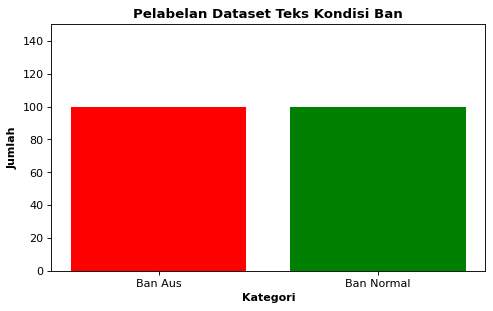

In [206]:
height = data['Label'].value_counts()
Labels = ('Ban Aus', 'Ban Normal')
y_pos = np.arange(len(Labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,150)
plt.title('Pelabelan Dataset Teks Kondisi Ban', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['red','green'])
plt.xticks(y_pos, Labels)
plt.show()

In [225]:
data = pd.read_csv('data_label.csv')

In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [227]:
#dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data['clean_teks'], data['Label'], test_size=0.2, random_state=42)

In [228]:
#ekstraksi fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [229]:
#melatih model SVM
model = SVC()
model.fit(X_train, y_train)

SVC()

In [255]:
# Teks baru yang akan diklasifikasikan
teks_baru = "Ban ini tebal warnanya juga hitam pekat"

clean_teksbaru = text_preprocessing_process(teks_baru)


In [256]:
# Ekstraksi fitur dari teks baru
teks_baru_vectorized = vectorizer.transform([teks_baru])

# Klasifikasikan teks baru
hasil_klasifikasi = model.predict(teks_baru_vectorized)

In [257]:
# Tampilkan hasil klasifikasi
if hasil_klasifikasi[0] == 'Ban Aus':
    print("Kondisi Ban Aus")
else:
    print("Kondisi Ban Normal")

Kondisi Ban Normal


In [262]:
data = pd.read_csv('data_label.csv')

In [267]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [269]:
from sklearn.preprocessing import LabelEncoder

#membuat label encoder
le = LabelEncoder()

#fitting label encoder pada kolom Sentiment
le.fit(data['Label'])

#menampilkan label encoder
print('Kelas Label:', le.classes_)

#transformasi kelas sentimen menjadi angka
data['Label'] = le.transform(data['Label'])

Kelas Label: ['Ban Aus' 'Ban Normal']


In [270]:
data

,Dokumen,clean_teks,Label
0,d1,ban aus alami rusak tipis retak sobek sebab gu...,0
1,d2,ban aus bawah twi alami rusak parah sobek teks...,0
2,d3,ban tanda aus signifikan pakai jalan jarak lew...,0
3,d4,ban capai pakai maksimal tapak ban halus aus a...,0
4,d5,ban aus pola kembang kikis atur jalan basah ce...,0
...,...,...,...
195,d196,ban kondisi normal ukur ban 195i65 r15 twi tap...,1
196,d197,ban normal ukur ban 215i60 r16 twi tapak ban m...,1
197,d198,ban kondisi normal ukur ban 185i55 r15 twi tap...,1
198,d199,ban kondisi normal bulu karet tapak ban jarak ...,1


In [271]:
#kolom fitur dan target

x = data['clean_teks']
y = data['Label']

In [272]:
x

0      ban aus alami rusak tipis retak sobek sebab gu...
1      ban aus bawah twi alami rusak parah sobek teks...
2      ban tanda aus signifikan pakai jalan jarak lew...
3      ban capai pakai maksimal tapak ban halus aus a...
4      ban aus pola kembang kikis atur jalan basah ce...
                             ...                        
195    ban kondisi normal ukur ban 195i65 r15 twi tap...
196    ban normal ukur ban 215i60 r16 twi tapak ban m...
197    ban kondisi normal ukur ban 185i55 r15 twi tap...
198    ban kondisi normal bulu karet tapak ban jarak ...
199    ban kondisi normal bulu karet tapak ban jarak ...
Name: clean_teks, Length: 200, dtype: object

In [273]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Label, Length: 200, dtype: int64

In [274]:
#tfidf dan n-gram

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(x)

TfidfVectorizer()

In [275]:
#jumlah fitur
print(len(tf_idf.get_feature_names_out()))

265


In [276]:
#fitur-fitur yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['150i70' '160i60' '170i60' '175i65' '180i55' '185i55' '185i60' '190i50'
 '195i50' '195i60' '195i65' '200i55' '205i50' '205i55' '215i60' '215i65'
 '225i40' '225i50' '225i55' '235i55' '265i70' 'abrasi' 'abu' 'abuan'
 'achilles' 'akibat' 'akumulasi' 'alami' 'alur' 'aman' 'andal' 'angin'
 'arah' 'area' 'asli' 'atur' 'aus' 'awat' 'bagus' 'bahan' 'bahu' 'bakar'
 'ban' 'banding' 'basah' 'batas' 'batu' 'bawah' 'beban' 'bekas' 'belok'
 'benda' 'bentuk' 'bentur' 'berat' 'bercak' 'bersih' 'besar' 'bfgoodrich'
 'biasa' 'bising' 'bocor' 'bridgestone' 'bulu' 'capai' 'cekung' 'celaka'
 'cemar' 'cengkeram' 'cepat' 'cokelat' 'coklat' 'colok' 'continental'
 'cuaca' 'cuat' 'cukup' 'dadak' 'dalam' 'deformasi' 'dunlop' 'efektif'
 'efisiensi' 'ekstrem' 'elastisitas' 'faktor' 'falken' 'gagal' 'ganggu'
 'ganti' 'gelap' 'gelincir' 'gelombang' 'gesek' 'goodyear' 'gores' 'grip'
 'gtradial' 'gulir' 'guna' 'hadap' 'halus' 'hankook' 'hilang' 'hitam'
 'ikat' 'imbang' 'indikasi' 'indikator' 'integritas' 'intensif' '

In [277]:
#matriks jumlah token
#data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

x_tf_idf = tf_idf.transform(x).toarray()
x_tf_idf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.18054952,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [278]:
#matriks jumlah token menggunakan tf idf, lihat perbedaan dengan bow
#data siap dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(x_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,150i70,160i60,170i60,175i65,180i55,185i55,185i60,190i50,195i50,195i60,...,twi,ubah,udara,ukir,ukur,urai,usia,wajar,warna,yakin
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.119143,0.242958,0.0,0.0,0.000000,0.0,0.0,0.0,0.18055,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.201476,0.000000,0.0,0.0,0.237680,0.0,0.0,0.0,0.00000,0.0
196,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.190901,0.000000,0.0,0.0,0.225204,0.0,0.0,0.0,0.00000,0.0
197,0.0,0.0,0.0,0.0,0.0,0.541225,0.0,0.0,0.0,0.0,...,0.194716,0.000000,0.0,0.0,0.229705,0.0,0.0,0.0,0.00000,0.0
198,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.175480,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0


In [279]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(x_tf_idf, output)

In [280]:
#mengubah nilai data tabular tf idf menjadi array aggar dapat dijalankan pada proses seleksi fitur

x = np.array(data_tf_idf)
y = np.array(y)

In [282]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=265)
x_kbest_features = chi2_features.fit_transform(x,y)

#reduced features
print('Original feature number: ', x.shape[1])
print('Reduced feature number: ', x_kbest_features.shape[1])

Original feature number:  265
Reduced feature number:  265


In [283]:
#chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya

data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,1.303233
1,2.769931
2,1.664006
3,0.376485
4,2.680328
...,...
260,0.452471
261,2.428055
262,0.650586
263,2.275095


In [284]:
#menampilkan fitur beserta nilainya

feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,1.303233,150i70
1,2.769931,160i60
2,1.664006,170i60
3,0.376485,175i65
4,2.680328,180i55
...,...,...
260,0.452471,urai
261,2.428055,usia
262,0.650586,wajar
263,2.275095,warna


In [285]:
#mengurutkan fitur terbaik

data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
36,19.063110,aus
171,16.563536,normal
242,12.602034,tebal
37,10.846949,awat
118,10.593924,jarak
...,...,...
100,0.210665,hadap
256,0.116187,ubah
236,0.091342,tahan
203,0.042822,r18


In [286]:
#menampilkan mask pada feature yang diseleksi
#False berarti fitur tidak terpilih dan True berarti fitur terpilih

mask = chi2_features.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [287]:
#menampilkan fitur-fitur terpilih  berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi padda Chi-square

new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

In [288]:
selected_feature

['150i70',
 '160i60',
 '170i60',
 '175i65',
 '180i55',
 '185i55',
 '185i60',
 '190i50',
 '195i50',
 '195i60',
 '195i65',
 '200i55',
 '205i50',
 '205i55',
 '215i60',
 '215i65',
 '225i40',
 '225i50',
 '225i55',
 '235i55',
 '265i70',
 'abrasi',
 'abu',
 'abuan',
 'achilles',
 'akibat',
 'akumulasi',
 'alami',
 'alur',
 'aman',
 'andal',
 'angin',
 'arah',
 'area',
 'asli',
 'atur',
 'aus',
 'awat',
 'bagus',
 'bahan',
 'bahu',
 'bakar',
 'ban',
 'banding',
 'basah',
 'batas',
 'batu',
 'bawah',
 'beban',
 'bekas',
 'belok',
 'benda',
 'bentuk',
 'bentur',
 'berat',
 'bercak',
 'bersih',
 'besar',
 'bfgoodrich',
 'biasa',
 'bising',
 'bocor',
 'bridgestone',
 'bulu',
 'capai',
 'cekung',
 'celaka',
 'cemar',
 'cengkeram',
 'cepat',
 'cokelat',
 'coklat',
 'colok',
 'continental',
 'cuaca',
 'cuat',
 'cukup',
 'dadak',
 'dalam',
 'deformasi',
 'dunlop',
 'efektif',
 'efisiensi',
 'ekstrem',
 'elastisitas',
 'faktor',
 'falken',
 'gagal',
 'ganggu',
 'ganti',
 'gelap',
 'gelincir',
 'gelomba

In [289]:
#cara melihat vocab yang dihasilkan oleh tf idf
#tf_idf.vocabulary_

kbest_feature = {} #buat dictionary kosong

for(k,v) in tf_idf.vocabulary_.items():         #iterasi untuk mengulangi vocab yang dihasilkan tf_idf
  if k in selected_feature:                     #cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                        #jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [290]:
kbest_feature

{'ban': 42,
 'aus': 36,
 'alami': 27,
 'rusak': 213,
 'tipis': 250,
 'retak': 209,
 'sobek': 227,
 'sebab': 215,
 'guna': 99,
 'tua': 253,
 'cuaca': 74,
 'panas': 179,
 'minim': 167,
 'rawat': 206,
 'bawah': 47,
 'twi': 255,
 'parah': 181,
 'tekstur': 244,
 'tapak': 241,
 'warna': 263,
 'ubah': 256,
 'pudar': 196,
 'tanda': 239,
 'intensif': 110,
 'kurang': 142,
 'signifikan': 223,
 'pakai': 178,
 'jalan': 116,
 'jarak': 118,
 'lewat': 152,
 'kasar': 122,
 'lapis': 147,
 'karet': 121,
 'kikis': 134,
 'pola': 193,
 'kembang': 124,
 'hilang': 103,
 'capai': 64,
 'maksimal': 161,
 'halus': 101,
 'atur': 35,
 'basah': 44,
 'cengkeram': 68,
 'turun': 254,
 'tingkat': 249,
 'risiko': 210,
 'gelincir': 91,
 'kendali': 126,
 'rata': 205,
 'ikat': 105,
 'kondisi': 137,
 'ekstrem': 83,
 'kelupas': 123,
 'gores': 95,
 'pengaruh': 186,
 'performa': 188,
 'kendara': 127,
 'tahan': 236,
 'akumulasi': 26,
 'pecah': 183,
 'letus': 151,
 'tepi': 246,
 'akibat': 25,
 'ketidakstabilan': 133,
 'tajam': 23

In [291]:
#menampilkan fitur-fitur yang sudah diseleksi
#beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning
#hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,150i70,160i60,170i60,175i65,180i55,185i55,185i60,190i50,195i50,195i60,...,twi,ubah,udara,ukir,ukur,urai,usia,wajar,warna,yakin
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.119143,0.242958,0.0,0.0,0.000000,0.0,0.0,0.0,0.18055,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.201476,0.000000,0.0,0.0,0.237680,0.0,0.0,0.0,0.00000,0.0
196,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.190901,0.000000,0.0,0.0,0.225204,0.0,0.0,0.0,0.00000,0.0
197,0.0,0.0,0.0,0.0,0.0,0.541225,0.0,0.0,0.0,0.0,...,0.194716,0.000000,0.0,0.0,0.229705,0.0,0.0,0.0,0.00000,0.0
198,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.175480,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0


In [292]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

In [293]:
#SVM

from sklearn.svm import SVC                                   #mengimpor algoritma SVM
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split          #digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                       #digunakan untuk menyimpan model yang telah dilatih

In [294]:
#proses memisahkan data uji dan data latih. perbandingan 80% untuk data latih, 20% untuk data uji
#random_state digunakan untuk internal random generator
#gunakan fitur (x) hasil seleksi fitur

x_train, x_test, y_train, y_test = train_test_split(x_kbest_features, y, test_size=0.3, random_state=42)

In [295]:
#membuat model svm

model1 =SVC(kernel='linear', C=1)

In [296]:
#melatih model svm

model1.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [297]:
#menyimpan model yang telah dilatih

dump(SVC, 'model1.joblib')

['model1.joblib']

In [298]:
#gunakan model yang telah dilatih untuk memprediksi label pada data uji

model_pred1 = model1.predict(x_test)

#tampilkan hasil prediksi label dari model
model_pred1

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [309]:
# Teks baru yang akan diklasifikasikan
teks_baru = "Ban ini aus tapi tebal dan tebal warnanya juga hitam pekat"

clean_teksbaru = text_preprocessing_process(teks_baru)

In [310]:
# Ekstraksi fitur dari teks baru
teks_baru_vectorized = vectorizer.transform([teks_baru])

# Klasifikasikan teks baru
hasil_klasifikasi = model.predict(teks_baru_vectorized)

In [311]:
# Tampilkan hasil klasifikasi
if hasil_klasifikasi[0] == 'Ban Aus':
    print("Kondisi Ban Aus")
else:
    print("Kondisi Ban Normal")

Kondisi Ban Aus


In [312]:
#svm

#hitung jumlah data yang berhasil diprediksi model dan jumlah data yang salah diprediksi

prediksi_benar = (model_pred1 == y_test).sum()
prediksi_salah = (model_pred1 != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 60
Jumlah prediksi salah	: 0
Akurasi pengujian	: 100.0 %


In [313]:
#svm
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred1)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[31  0]
 [ 0 29]]


In [314]:
#svm
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred1))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [315]:
#cross validation svm
from sklearn.model_selection import ShuffleSplit        #bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score     #untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model1, x_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

Rata-rata akurasi pada cross validation: 1.0
